<a href="https://colab.research.google.com/github/shivanivadlamani/Product-Recommendation-Systems/blob/main/Amazon_Product_recommendation_system_for_Electronics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

**Introduction to Recommendation systems**

A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions

Attribute Information:

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

**Steps -**
1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

4. Build Popularity Recommender model.

5. Build Collaborative Filtering model.

6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

8. Summarise your insights.

## **Load necessary libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Read and explore the dataset ( Rename column/add headers, plot histograms, find data characteristics)**

In [3]:
columns = ['userID', 'productID', 'ratings','timestamp']

In [4]:
recomm_df = pd.read_csv('/content/drive/MyDrive/Onelogica/ratings_Electronics.csv',names=columns)

In [5]:
recomm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
recomm_df.shape

(7824482, 4)

In [7]:
recomm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


In [8]:
recomm_df.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## **Dropping the "timestamp" as it is not a needed field**

In [9]:
recomm_df = recomm_df.drop('timestamp', axis=1)

## **Missing Value**

In [10]:
recomm_df.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

In [11]:
recomm_df.shape

(7824482, 3)

# **Plot histograms**

array([[<Axes: title={'center': 'ratings'}>]], dtype=object)

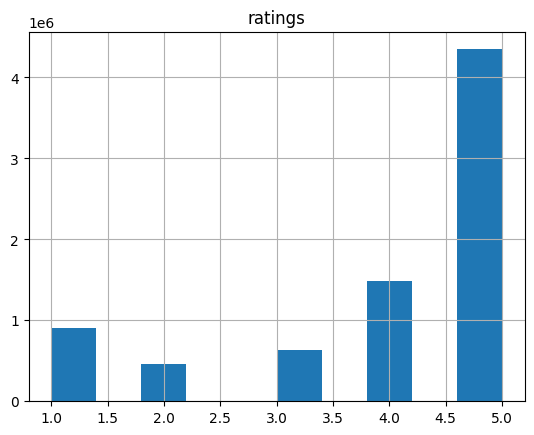

In [12]:
recomm_df.hist('ratings',bins = 10)

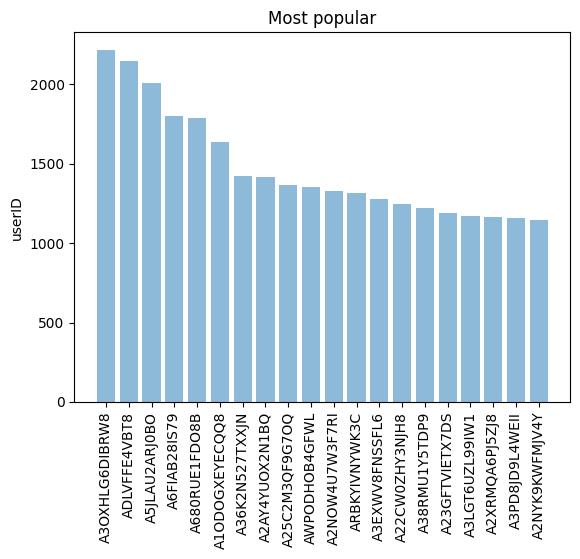

In [13]:
popular = recomm_df[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')

plt.show()

In [14]:
# find unique users
recomm_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1IUWX30VMVJGP      1
A1WBP7XSZI6AUL      1
A2K7UNJHE9ZR0G      1
A1A6SIW6EWF6FP      1
A10M2KEFPEQDHN      1
Name: userID, Length: 4201696, dtype: int64

In [15]:
print('Number of unique users', len(recomm_df['userID'].unique()))

Number of unique users 4201696


In [16]:
print('Number of unique products', len(recomm_df['productID'].unique()))

Number of unique products 476002


In [17]:
print('Unique Ratings', recomm_df['ratings'].unique())

Unique Ratings [5. 1. 3. 2. 4.]


In [18]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)]

In [19]:
print('Number of unique products rated low',len(min_ratings1['productID'].unique()))

Number of unique products rated low 176283


In [20]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)]

In [21]:
print('Number of unique products rated medium',len(med_ratings1['productID'].unique()))

Number of unique products rated medium 152827


In [22]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0]

In [23]:
print('Number of unique products rated high',len(max_ratings1['productID'].unique()))

Number of unique products rated high 410110


In [24]:
avg_rating_prod = recomm_df.groupby('productID').sum() / recomm_df.groupby('productID').count()

In [25]:
avg_rating_prod.drop('userID', axis=1,inplace =True)
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


# **Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )**

In [26]:
userID = recomm_df.groupby('userID').count()
top_user = userID[userID['ratings'] >= 50].index
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)]

In [27]:
topuser_ratings_df.shape

(125871, 3)

In [28]:
topuser_ratings_df.head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [29]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()


,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


# **Keep data only for products that have 50 or more ratings**

In [30]:
prodID = recomm_df.groupby('productID').count()


In [31]:
top_prod = prodID[prodID['ratings'] >= 50].index

In [32]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]

In [33]:
top_ratings_df.sort_values(by='ratings', ascending=False).head()

,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [34]:
top_ratings_df.shape

(79182, 3)

# **Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)**

In [35]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [36]:
train_data.head()

,userID,productID,ratings
3679937,A2W0XCWOK3MW6F,B003Y74AXO,3.0
3603561,A2E1EFNIZL2FVA,B003VANO7C,5.0
6945634,AR3EVUQF0AC7R,B00ARB5FLQ,4.0
2732999,A38RMU1Y5TDP9,B002NGVY8G,1.0
7715921,A1JZFGZEZVWQPY,B00GRNUO2I,3.0


In [37]:
test_data.head()

,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


# **Build Popularity Recommender model.**

In [38]:
#Building the recommendations based on the average of all user ratings for each product.
train_data_grouped = train_data.groupby('productID').mean().reset_index()

In [39]:
train_data_grouped.head()

,productID,ratings
0,0972683275,4.5
1,1400501466,3.0
2,1400501520,5.0
3,1400501776,4.0
4,1400532620,1.0


In [40]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)

In [41]:
train_data_sort.head()

,productID,ratings
14854,B00L3YHF6O,5.0
14851,B00K7O2DJU,5.0
14850,B00K4VQZCM,5.0
14849,B00K0OBEE2,5.0
14845,B00JLADOGW,5.0


In [42]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)

productID
B0088CJT4U    135
B003ES5ZUU    128
B007WTAJTO    123
B000N99BBC    122
B00829TIEK    102
B008DWCRQW    102
B00829THK0     98
B002R5AM7C     94
B004CLYEDC     82
B004CLYEFK     76
Name: ratings, dtype: int64

In [43]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())

In [44]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())

In [45]:
ratings_mean_count.head()

,ratings,rating_counts
productID,,
0972683275,4.5,2
1400501466,3.0,4
1400501520,5.0,1
1400501776,4.0,1
1400532620,1.0,1


In [46]:
pred_df = test_data[['userID', 'productID', 'ratings']]

In [47]:
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)

In [48]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')

In [49]:
pred_df.head(3)

,userID,productID,true_ratings,ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5


In [50]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)

In [51]:
pred_df.head()

,userID,productID,true_ratings,predicted_ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5
3,A1CMD08Z49PGKQ,B009A6CZ30,5.0,4.5
4,A1F9Z42CFF9IAY,B009A6CZ30,5.0,4.5


In [52]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


## **Build Collaborative Filtering model**

In [53]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162663 sha256=b4a356dd2d160db1927067947e98543c790273139da7db1d28013aaf3cd0946d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [54]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [55]:
reader = Reader(rating_scale=(0.5, 5.0))

## **Converting Pandas Dataframe to Surpise format**

In [56]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)

In [57]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [58]:
type(trainset)

surprise.trainset.Trainset

## **KNNWithMeans**

In [59]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


## **SVD**

In [60]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

### **Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.**

**Popularity Recommender Model (RMSE)**

In [61]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


In [62]:
print(len(testset))
type(testset)

23755


list

**KNNWithMeans**

In [63]:
# Evalute on test set
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.3492063492063493, details={'actual_k': 2, 'was_impossible': False})

In [64]:
# compute RMSE
accuracy.rmse(test_pred) #range of value of error

RMSE: 0.9941


0.9940800621800723

**SVD**

In [65]:
test_pred = svd_model.test(testset)

In [66]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 0.9600


0.9600421925247244

**Parameter tuning of SVD Recommendation system**

In [67]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [68]:
gs.fit(data)

In [69]:
# get best parameters
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.02}}

In [70]:
# Use the "best model" for prediction
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8577


0.8577408156016854

### **The RMSE value for Collaborative Filtering model, byKNNWithMeans is 0.9941 and SVD is 0.9606. After parameter tuning of SVD it is 0.858**

### **Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products**

In [71]:
from collections import defaultdict

def get_top_n(predictions, n=5):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for user_id, item_id, true_rating, estimated_rating, _ in predictions:
        top_n[user_id].append((item_id, estimated_rating))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for user_id, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_id] = user_ratings[:n]

    return top_n


In [72]:
top_n = get_top_n(test_pred, n=5)

In [73]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B008JJLW4M', 'B000N99BBC', 'B000VX6XL6', 'B002IO2UM2', 'B000M2GYF6']
A38NHXL5257E3B ['B00BOHNYU6', 'B003SGCO3E', 'B004Q3R9AQ', 'B00829TIEK', 'B00829THK0']
A36IHC0K68NS2 ['B004ING996', 'B00HMREOLK', 'B00ATM1MGA', 'B005DKZTNK', 'B009N8M2P6']
A231WM2Z2JL0U3 ['B00008OE6I', 'B00006HZ0L', 'B00005LB8P', 'B00004RC2D', 'B00008OE5G']
A2AC6GQ24S45GA ['B001TOD7ME', 'B000PGHCG4', 'B009E6J1BU', 'B009VV56TY', 'B0042TS7GE']
A3OXHLG6DIBRW8 ['B001TH7GVE', 'B001T9NUJE', 'B007KEZMX4', 'B004CLYEFK', 'B002VPE1X4']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B001TOD7ME', 'B005BCCML2', 'B00387EW1K', 'B000MKKTJK']
AG35JCCQWDRCS ['B000068O16', 'B0036Q7MV0', 'B0045TYDNC', 'B001MSVPM6', 'B004GYVPGE']
A2X3L31KCXBHCL ['B00829THEG', 'B0044DEDC0', 'B002V1APJ2', 'B001H5WLP4', 'B00DQZQ5T6']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00HFRWWAM', 'B00HRQB28Y', 'B00C4Q61Z6', 'B00HCVJDP8']
AX05DBU8IRUWY ['B007WTAJTO', 'B006W8U2MU', 'B009GHYMB6', 'B001L1H0SC', 'B001FO4QHI']
A296QED1MV1V0J ['B008AST7R6', 'B0058G40O8', 'B001S2PPT0',

## **Summary**






We began our process by reading and exploring the dataset, focusing specifically on the first three columns: ‘userId’, ‘productId’, and ‘ratings’.

We then conducted an analysis of the data, creating histograms based on the ratings and ‘userId’.

Following this, we divided the data randomly into a training set and a testing set.

We proceeded to build two types of recommender models: a Popularity Recommender model and a Collaborative Filtering model. The Popularity Recommender model yielded a Root Mean Square Error (RMSE) value of 1.091.

For the Collaborative Filtering model, we used two methods: KNNWithMeans and Singular Value Decomposition (SVD). The RMSE values for these were 0.9941 and 0.9606 respectively. After tuning the parameters of the SVD model, we were able to reduce the RMSE to 0.858.

Based on these results, the Collaborative Filtering model performed better, with an RMSE score of 0.86.

We then used these models to recommend five new products to each user, based on their individual habits.

In summary, Collaborative Filtering, which uses user behavior (in this case, explicit ratings) to identify similar items or users and make recommendations accordingly, performed better in our tests. However, the Popularity-based algorithm, which recommends the most popular items to users, also has its use cases, particularly when a user simply wants to browse the most popular items.